
# Economic Activities Dataset


# In this lab you will:
1. Load and inspect the data  
2. Perform exploratory data analysis (EDA)  
3. Create visualizations  
4. Build and evaluate a predictive model  
#
# Dataset columns:
- `النشاط الاقتصادي` (Economic Activity)  
- `متوسط الإيرادات (دينار)` (Avg. Revenue in JD)  
- `عدد المنشآت الاقتصادية` (Number of Establishments)  
- `مستوى النشاط` (Activity Level: منخفض/متوسط/مرتفع)  
- `السنة` (Year)  
- `الربع` (Quarter)  
- `مدعومة حكوميًا؟` (Gov’t Supported? yes/no)  
- `احتمال الإغلاق` (Closure Flag: 1 = likely to close, 0 = likely to remain open)  

- Save the Excel file as `economic_data.xlsx` in your working directory.



In [1]:
# 1. Setup: imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# %%
# 2. Load the data
df = pd.read_excel("المنشآت_الاقتصادية_مع_دعم_وإيرادات.xlsx")

# Quick look
print("Shape:", df.shape)
display(df.head(20))

Shape: (288, 8)


,النشاط الاقتصادي,متوسط الإيرادات (دينار),عدد المنشآت الاقتصادية,مستوى النشاط,السنة,الربع,مدعومة حكوميًا؟,احتمال الإغلاق
0,التعدين واستغلال المحاجر,32220,665,منخفض,2017,4,لا,1
1,الصناعة التحويلية,45686,108045,منخفض,2017,4,لا,1
2,الصناعة التحويلية,12963,108045,منخفض,2017,4,لا,1
3,التعليم,42671,9298,منخفض,2017,4,لا,1
4,الأنشطة المهنية والعلمية والتقنية,29713,12643,منخفض,2017,4,لا,1
5,الأنشطة المهنية والعلمية والتقنية,27312,12643,منخفض,2017,4,لا,1
6,التعدين واستغلال المحاجر,26998,665,منخفض,2017,4,نعم,1
7,النقل والتخزين,10200,16631,منخفض,2017,4,لا,1
8,النقل والتخزين,43726,16631,منخفض,2017,4,لا,1
9,الأنشطة الإدارية وخدمات الدعم,16401,21346,منخفض,2017,4,نعم,1


# أسئلة التحليل الوصفي (EDA) التفاعلية

#  ما متوسط الإيرادات لجميع الأنشطة؟ وهل هو رقم يعكس حالة اقتصادية جيدة أم لا؟


In [3]:
df['متوسط الإيرادات (دينار)'].mean()

# 🔎 هل تعتقد أن هذا الرقم يُعتبر مرتفعًا أم منخفضًا بالنسبة لحجم السوق؟


36275.89236111111

# ما أعلى نشاط اقتصادي من حيث متوسط الإيرادات؟ وما السبب المتوقع لذلك؟



In [4]:
df.groupby('النشاط الاقتصادي')['متوسط الإيرادات (دينار)'].mean().idxmax()
#🔎 هل تتوقع أن هذا النشاط مدعوم؟ هل هو نشاط موسمي أو أساسي؟



'تجارة الجملة والتجزئة؛ إصلاح المركبات ذات المحركات والدراجات النارية'

#  ما أدنى نشاط اقتصادي من حيث متوسط الإيرادات؟ وماذا يمكن أن نوصي لدعمه؟



In [13]:
df.groupby('النشاط الاقتصادي')['متوسط الإيرادات (دينار)'].mean().idxmin()

# هل هذا النشاط يعاني من ضعف في الطلب؟ هل يحتاج لتدخل حكومي؟



'الأنشطة الإدارية وخدمات الدعم'

#   ما النشاط الأكثر انتشارًا من حيث عدد المنشآت؟


In [5]:
df.groupby('النشاط الاقتصادي')['عدد المنشآت الاقتصادية'].mean().idxmax()
#هل الانتشار دليل على النجاح؟ أم أن كثرة المنشآت تؤدي إلى منافسة مفرطة؟



'تجارة الجملة والتجزئة؛ إصلاح المركبات ذات المحركات والدراجات النارية'

# كم نسبة الأنشطة التي تواجه خطر الإغلاق؟ وهل الرقم يدعو للقلق؟

In [6]:
df['احتمال الإغلاق'].value_counts(normalize=True)
#💬 إذا كانت النسبة عالية، ما السياسات التي يجب دراستها؟



احتمال الإغلاق
1    0.951389
0    0.048611
Name: proportion, dtype: float64

# هل هناك علاقة بين الدعم الحكومي ومتوسط الإيرادات؟

In [8]:
df.groupby('مستوى النشاط')['متوسط الإيرادات (دينار)'].mean()
#هل يتماشى مستوى النشاط مع الإيرادات فعلاً

مستوى النشاط
عالٍ     167037.357143
متوسط     54035.000000
منخفض     29414.941176
Name: متوسط الإيرادات (دينار), dtype: float64

# ما هو متوسط الإيرادات لكل مستوى نشاط (مرتفع / منخفض)؟


In [19]:
df.groupby('مدعومة حكوميًا؟')['متوسط الإيرادات (دينار)'].mean()
# هل الأنشطة المدعومة تحقق فعلاً إيرادات أعلى؟ أم لا يوجد فرق؟



مدعومة حكوميًا؟
لا     32071.708520
نعم    50699.476923
Name: متوسط الإيرادات (دينار), dtype: float64

# هل هناك علاقة ارتباط بين عدد المنشآت ومتوسط الإيرادات؟

In [9]:
df[['عدد المنشآت الاقتصادية', 'متوسط الإيرادات (دينار)']].corr()
#هل كثرة المنشآت تؤدي إلى إيرادات أعلى؟ أم العكس؟

,عدد المنشآت الاقتصادية,متوسط الإيرادات (دينار)
عدد المنشآت الاقتصادية,1.000000,0.833446
متوسط الإيرادات (دينار),0.833446,1.000000


# كيف يتغير عدد المنشآت بمرور الوقت؟ ما الفترات التي شهدت نمواً؟



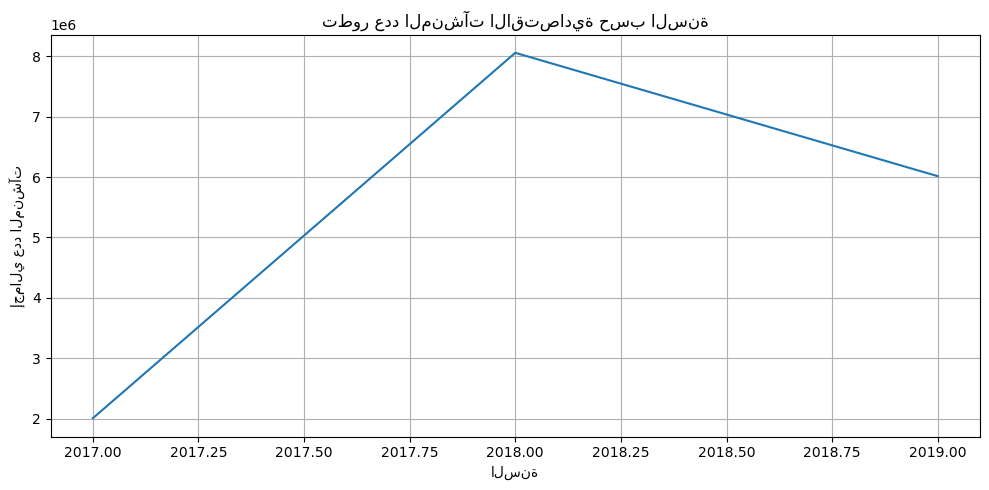

In [30]:
# رسم خطي بسيط لتطور عدد المنشآت الاقتصادية مع الزمن
df.groupby('السنة')['عدد المنشآت الاقتصادية'].sum().plot(
 figsize=(10, 5), title='تطور عدد المنشآت الاقتصادية حسب السنة'
)
plt.xlabel('السنة')
plt.ylabel('إجمالي عدد المنشآت')
plt.grid(True)
plt.tight_layout()
plt.show()

# اربط هذا النمو بأحداث اقتصادية أو مواسم دعم.

# كيف تطور عدد منشآت "الصناعة التحويلية" عبر الفصول؟ هل كانت مستقرة؟

In [ ]:
df[df['النشاط الاقتصادي'] == 'الصناعة التحويلية'].groupby(['السنة', 'الربع'])['عدد المنشآت الاقتصادية'].sum()
# هل واجهت تقلبات؟ هل هذا مرتبط بانخفاض الطلب أو مشاكل التوريد

# ما عدد الأنشطة الفريدة؟ وهل هناك أنشطة تتكرر كثيراً في البيانات؟

In [ ]:
df['النشاط الاقتصادي'].nunique(), df['النشاط الاقتصادي'].value_counts()
#هل كثرة التكرار تدل على أهمية القطاع؟ أم على تكرار في التبويب؟

# هل هناك نشاط اقتصادي مدعوم لكنه يحقق إيرادات منخفضة؟

In [16]:
df[df['مدعومة حكوميًا؟'] == "نعم"].sort_values(by='متوسط الإيرادات (دينار)').head()
# هل الدعم يُوزع بناءً على الأداء؟ أم على نوع النشاط فقط؟

,النشاط الاقتصادي,متوسط الإيرادات (دينار),عدد المنشآت الاقتصادية,مستوى النشاط,السنة,الربع,مدعومة حكوميًا؟,احتمال الإغلاق
94,أنشطة خدماتية أخرى,10210,78903,منخفض,2018,2,نعم,1
45,الأنشطة الإدارية وخدمات الدعم,10751,21453,منخفض,2018,1,نعم,1
274,التعليم,12295,9287,منخفض,2019,4,نعم,1
228,التعليم,12627,8954,منخفض,2019,2,نعم,1
86,الأنشطة الإدارية وخدمات الدعم,12974,21453,منخفض,2018,2,نعم,1


# إذا أردت تحسين الأداء العام، ما النشاط تقترح أن يحصل على دعم إضافي؟ ولماذا؟


 التحليل الداعم للاقتراح:
متوسط الإيرادات منخفض جدًا رغم أن القطاع يُعد من البنى التحتية الأساسية للاقتصاد (كما ظهر في السؤال 3):

-----------
df[df['النشاط الاقتصادي'] == 'النقل والتخزين']['متوسط الإيرادات (دينار)'].mean()
عدد المنشآت لا يزال مرتفع نسبيًا، ما يعني أن هناك رغبة في الاستثمار بالقطاع، لكن الأداء المالي لا يتناسب:
----------------
python
Copy code
df[df['النشاط الاقتصادي'] == 'النقل والتخزين']['عدد المنشآت الاقتصادية'].mean()
الدعم الحكومي ضعيف أو غير موجود للقطاع حسب النتائج في:
-----------------
python
Copy code
df[df['النشاط الاقتصادي'] == 'النقل والتخزين']['مدعومة حكوميًا؟'].value_counts()
القطاع حيوي جداً ويتأثر مباشرة بارتفاع تكاليف الطاقة والوقود، مما يبرر دعمه لتقليل الأعباء التشغيلية.

#  القسم الأول: أسئلة المعالجة المبدئية (Preprocessing Questions)

## ما وصف إحصائي مختصر (متوسط، انحراف، إلخ) للإيرادات وعدد المنشآت؟



In [ ]:
df[['متوسط الإيرادات (دينار)', 'عدد المنشآت الاقتصادية']].describe()


##  هل هناك صفوف تحتوي على بيانات مفقودة بالكامل؟


In [ ]:
df[df.isnull().all(axis=1)]


## كيف يمكن ترميز الأعمدة النصية رقمياً باستخدام LabelEncoder؟

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['مستوى النشاط'] = le.fit_transform(df['مستوى النشاط'])
df['النشاط الاقتصادي'] = le.fit_transform(df['النشاط الاقتصادي'])


##  كيف نطبّق Standard Scaling على الأعمدة الرقمية؟

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['متوسط الإيرادات (دينار)', 'عدد المنشآت الاقتصادية']] = scaler.fit_transform(
    df_scaled[['متوسط الإيرادات (دينار)', 'عدد المنشآت الاقتصادية']]
)


## 1. تحديد المشكلة
نوع المشكلة: تصنيف ثنائي (Binary Classification)

الهدف: التنبؤ بـ احتمال الإغلاق = 0 أو 1



In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ترميز الأعمدة النصية
le = LabelEncoder()
df['النشاط الاقتصادي'] = le.fit_transform(df['النشاط الاقتصادي'])
df['مستوى النشاط'] = le.fit_transform(df['مستوى النشاط'])
df['مدعومة حكوميًا؟'] = df['مدعومة حكوميًا؟'].map({'نعم': 1, 'لا': 0})

# اختيار المدخلات والمخرجات
X = df[['متوسط الإيرادات (دينار)', 'عدد المنشآت الاقتصادية', 'مدعومة حكوميًا؟',
        'النشاط الاقتصادي', 'السنة', 'الربع', 'مستوى النشاط']]
y = df['احتمال الإغلاق']

# تحجيم البيانات
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
new_data = scaler.transform([[15000, 500, 0, le.transform(['النقل والتخزين'])[0], 2024, 1, le.transform(['منخفض'])[0]]])
model_rf.predict(new_data)


##  الجزء الثاني: التعلم العميق (Deep Learning)
📌 الهدف:
بناء نموذج شبكة عصبية لتوقع احتمال إغلاق منشأة (0 أو 1).



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# تقسيم البيانات
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### . بناء نموذج الشبكة العصبية

In [ ]:
model_dl = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # للإغلاق: نعم أو لا
])
model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


###  تدريب النموذج

In [ ]:
history = model_dl.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=8)


In [73]:
from sklearn.linear_model import LogisticRegression

# تدريب نموذج الانحدار اللوجستي
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار
y_pred_log = log_model.predict(X_test)
r2 = r2_score(y_test, y_pred_log)
print(f"R² (r2_score): {r2:.3f}")

R² (r2_score): 1.000


In [76]:
from sklearn.neighbors import KNeighborsClassifier

# تدريب نموذج KNN
knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X_train, y_train)

# التنبؤ والتقييم
y_pred_knn = knn_model.predict(X_test)
r2 = r2_score(y_test, y_pred_knn)
print(f"R² (r2_score): {r2:.3f}")

R² (r2_score): 1.000


# NLP :


## استخراج الكلمات المفتاحية لكل قطاع
الفكرة:
قسّم النشاط الاقتصادي إلى كلمات ثم استخرج الأكثر تكرارًا أو شيوعًا (مثل: "الإمدادات"، "الخدمات"، "الصناعة").

In [20]:
from collections import Counter
words = ' '.join(df['النشاط الاقتصادي']).split()
word_counts = Counter(words)
word_counts.most_common(10)


[('الأنشطة', 64),
 ('وخدمات', 32),
 ('إمدادات', 32),
 ('التعدين', 16),
 ('واستغلال', 16),
 ('المحاجر', 16),
 ('الصناعة', 16),
 ('التحويلية', 16),
 ('التعليم', 16),
 ('المهنية', 16)]

# 3. تصنيف الأنشطة حسب المحتوى النصي

الفكرة: ## 
إنشاء نموذج يصنف النشاط إلى تصنيفات كبرى مثل:

"خدمات"

"صناعة"

"مالية"

"زراعية"

In [22]:
# مثال ترميز يدوي
def classify_sector(text):
    if 'المالية' in text or 'التأمين' in text:
        return 'مالية'
    elif 'الصناعة' in text:
        return 'صناعية'
    elif 'الزراعة' in text or 'صيد' in text:
        return 'زراعية'
    elif 'التعليم' in text or 'الصحة' in text:
        return 'خدمات عامة'
    else:
        return 'أخرى'

df['التصنيف العام'] = df['النشاط الاقتصادي'].apply(classify_sector)
df

,النشاط الاقتصادي,متوسط الإيرادات (دينار),عدد المنشآت الاقتصادية,مستوى النشاط,السنة,الربع,مدعومة حكوميًا؟,احتمال الإغلاق,التصنيف العام
0,التعدين واستغلال المحاجر,32220,665,منخفض,2017,4,لا,1,أخرى
1,الصناعة التحويلية,45686,108045,منخفض,2017,4,لا,1,صناعية
2,الصناعة التحويلية,12963,108045,منخفض,2017,4,لا,1,صناعية
3,التعليم,42671,9298,منخفض,2017,4,لا,1,خدمات عامة
4,الأنشطة المهنية والعلمية والتقنية,29713,12643,منخفض,2017,4,لا,1,أخرى
...,...,...,...,...,...,...,...,...,...
283,الصناعة التحويلية,45173,109823,منخفض,2019,4,لا,1,صناعية
284,البناء والتشييد,45839,32698,منخفض,2019,4,لا,1,أخرى
285,الأنشطة الإدارية وخدمات الدعم,42867,22364,منخفض,2019,4,لا,1,أخرى
286,الإقامة وخدمات الطعام,19235,107383,منخفض,2019,4,لا,1,أخرى


In [23]:
# إنشاء عمود جديد فارغ
df['التصنيف العام'] = ''

# التكرار عبر كل صف وتعبئة العمود الجديد بناءً على الشرط
for i in range(len(df)):
    text = df.loc[i, 'النشاط الاقتصادي']
    
    if 'المالية' in text or 'التأمين' in text:
        df.loc[i, 'التصنيف العام'] = 'مالية'
        
    elif 'الصناعة' in text:
        df.loc[i, 'التصنيف العام'] = 'صناعية'
        
    elif 'الزراعة' in text or 'صيد' in text:
        df.loc[i, 'التصنيف العام'] = 'زراعية'
        
    elif 'التعليم' in text or 'الصحة' in text:
        df.loc[i, 'التصنيف العام'] = 'خدمات عامة'
        
    else:
        df.loc[i, 'التصنيف العام'] = 'أخرى'


In [27]:
import re
import nltk
from nltk.corpus import stopwords

# تحميل كلمات التوقف العربية من NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words("arabic"))

# أنماط لإزالة بعض الكلمات أو العبارات الشائعة غير المفيدة
pattern_1 = r'(الأنشطة|أنشطة)'

pattern_3 = r"\bو(?=\w)"  # حرف الواو في بداية الكلمة (غير مفيد)

# قائمة جديدة لتخزين النصوص المنظفة
processed_texts = []

# تنظيف النصوص في العمود
for i in range(len(df)):
    text = df.loc[i, "النشاط الاقتصادي"]

    # 1. إزالة بعض الأنماط المحددة
    text = re.sub(pattern_1, "الأنشطة", text)




    # 5. توحيد بعض الحروف
    text = re.sub(r"[إأآ]", "ا", text)
    text = re.sub(r"[ة]", "ه", text)

    # 6. إزالة الواو من بداية الكلمة إذا لم تكن مهمة
    text = re.sub(pattern_3, "", text)

    # 7. إزالة الكلمات الشائعة (Stopwords)
    filtered_words = []
    for word in text.split():
        if word not in stop_words:
            filtered_words.append(word)

    # 8. إعادة بناء النص المنظف
    text = " ".join(filtered_words)

    # 9. تنظيف المسافات الزائدة
    text = re.sub(r'\s+', ' ', text).strip()

    # إضافة النص المنظف للقائمة
    processed_texts.append(text)

# إضافة العمود الجديد إلى DataFrame
df["النشاط_المنظف"] = processed_texts
df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amjaadaltakhaineh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,النشاط الاقتصادي,متوسط الإيرادات (دينار),عدد المنشآت الاقتصادية,مستوى النشاط,السنة,الربع,مدعومة حكوميًا؟,احتمال الإغلاق,التصنيف العام,النشاط_المنظف
0,التعدين واستغلال المحاجر,32220,665,منخفض,2017,4,لا,1,أخرى,التعدين استغلال المحاجر
1,الصناعة التحويلية,45686,108045,منخفض,2017,4,لا,1,صناعية,الصناعه التحويليه
2,الصناعة التحويلية,12963,108045,منخفض,2017,4,لا,1,صناعية,الصناعه التحويليه
3,التعليم,42671,9298,منخفض,2017,4,لا,1,خدمات عامة,التعليم
4,الأنشطة المهنية والعلمية والتقنية,29713,12643,منخفض,2017,4,لا,1,أخرى,الانشطه المهنيه العلميه التقنيه
...,...,...,...,...,...,...,...,...,...,...
283,الصناعة التحويلية,45173,109823,منخفض,2019,4,لا,1,صناعية,الصناعه التحويليه
284,البناء والتشييد,45839,32698,منخفض,2019,4,لا,1,أخرى,البناء التشييد
285,الأنشطة الإدارية وخدمات الدعم,42867,22364,منخفض,2019,4,لا,1,أخرى,الانشطه الاداريه خدمات الدعم
286,الإقامة وخدمات الطعام,19235,107383,منخفض,2019,4,لا,1,أخرى,الاقامه خدمات الطعام


In [28]:
from collections import Counter
words = ' '.join(df['النشاط_المنظف']).split()
word_counts = Counter(words)
word_counts.most_common(10)

[('الانشطه', 96),
 ('خدمات', 32),
 ('امدادات', 32),
 ('التعدين', 16),
 ('استغلال', 16),
 ('المحاجر', 16),
 ('الصناعه', 16),
 ('التحويليه', 16),
 ('التعليم', 16),
 ('المهنيه', 16)]